In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import DBSCAN ,KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram ,linkage
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.neighbors import NearestNeighbors


data =pd.read_csv("/content/Wine_clust  (1).csv")
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [3]:
data.isnull().any()

Alcohol                 False
Malic_Acid              False
Ash                     False
Ash_Alcanity            False
Magnesium               False
Total_Phenols           False
Flavanoids              False
Nonflavanoid_Phenols    False
Proanthocyanins         False
Color_Intensity         False
Hue                     False
OD280                   False
Proline                 False
dtype: bool

In [4]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

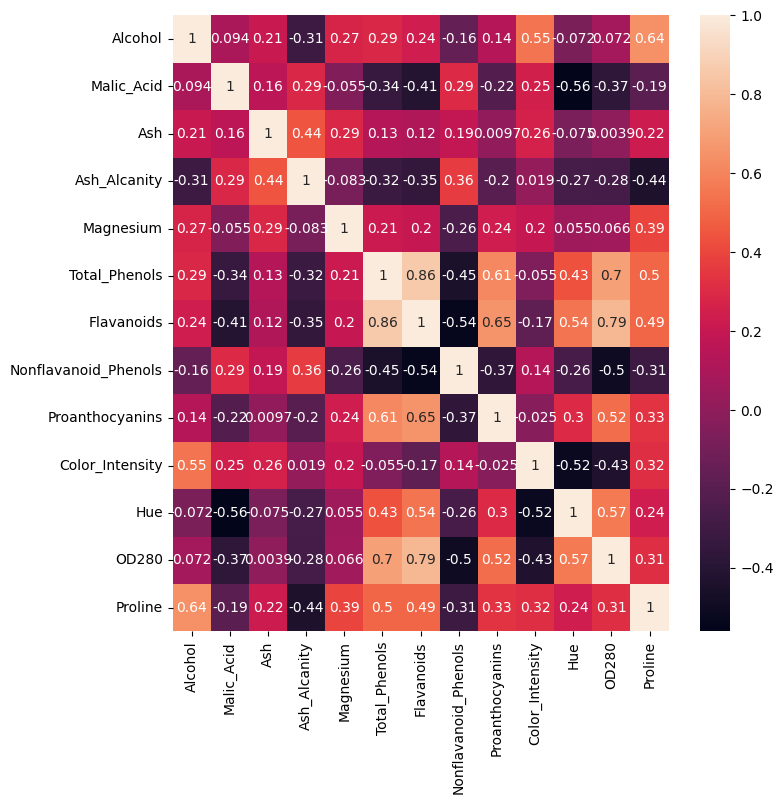

In [7]:
plt.figure(figsize =(8 ,8))
sns.heatmap(data.corr() ,annot=True)
plt.show()

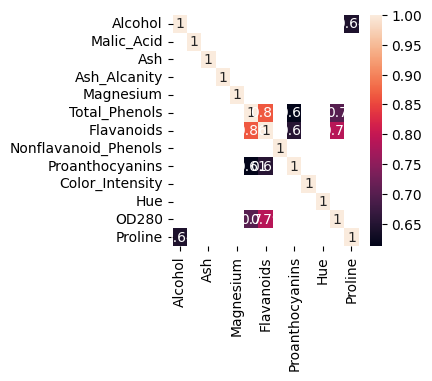

In [9]:
corr =data.corr().abs()
high_corr =corr[(corr)>0.6]
plt.figure(figsize =(3,3))
sns.heatmap(high_corr ,annot=True)
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler =StandardScaler()
X_standardized =scaler.fit_transform(data)
x_train ,test =train_test_split(X_standardized ,test_size =0.4 ,random_state =42)
x_val ,x_test =train_test_split(test ,test_size =0.5 ,random_state =42)

In [14]:
x_train =pd.DataFrame(x_train)
x_train.columns =data.columns
x_train

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,-1.656018,-0.409647,-1.632171,-1.049479,-0.192495,-1.097777,-0.461091,-0.176095,-0.772492,-0.544212,1.195772,-0.666229,-1.015514
1,1.358028,-0.158301,-0.243142,-0.448909,0.369212,1.049347,1.295850,-1.143031,1.382572,0.299300,1.283518,0.788587,2.430109
2,-0.161348,2.040973,0.414820,0.602088,-0.964842,-0.953567,-1.384741,0.871420,-1.280596,1.121183,-1.831492,-1.061713,-0.388168
3,0.061000,3.109192,-0.864550,0.602088,-0.964842,0.520578,0.623193,-0.498407,0.734300,-1.063296,-0.997898,0.689716,-1.168369
4,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,1.061565,-0.741782,1.109334,1.653086,-0.964842,1.049347,0.834026,-1.223610,0.489009,-0.725891,1.766126,0.774463,-1.072834
102,-0.927212,-0.544297,-0.901103,-0.148624,-1.386122,-1.033684,0.000733,0.065639,0.068508,-0.717240,0.186684,0.788587,-0.754385
103,1.703902,-0.418624,0.049285,-2.250619,0.158572,1.610163,1.617120,-0.578985,2.398780,1.056297,1.064151,0.548472,2.547935
104,-0.383696,-0.723829,-0.389355,0.361860,-1.386122,-1.466313,-0.571528,1.757779,0.050988,-0.868639,0.011190,-0.779224,-0.802153


In [16]:
test =pd.DataFrame(test)

test.columns =x_train.columns
test

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.789806,0.685502,0.707247,-1.289707,1.141558,0.648764,1.004700,-1.545922,0.121071,0.018129,0.011190,1.056952,0.312420
1,1.493907,1.529305,0.268606,-0.178653,0.790492,0.889114,0.623193,-0.498407,-0.597284,0.078689,-0.383670,1.014578,1.060776
2,-0.087232,0.425180,1.218995,0.451946,-0.262708,-1.209940,-1.535336,1.354888,-1.473326,-0.198156,-0.822404,-0.426113,-0.467781
3,0.900980,-0.750759,1.218995,0.902373,0.088358,1.129464,1.225573,-0.578985,1.382572,0.277671,1.020278,0.138864,1.713598
4,-0.778980,-1.046988,-1.632171,0.031547,-1.526548,-0.296611,-0.029386,-0.740141,-0.965221,-0.163550,0.713164,1.226445,-0.754385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-0.927212,1.385679,-0.608676,-0.298767,0.860705,-1.466313,-1.254225,-0.578985,-0.790013,1.363422,-1.348885,-0.863971,0.344265
68,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
69,0.839217,-0.454530,-0.023821,-0.689137,0.298998,0.200111,0.663351,0.468530,0.664217,-0.526909,1.195772,0.364855,0.774172
70,-0.655454,-0.732806,-0.608676,-0.148624,4.371372,0.328298,0.241685,-0.337251,2.959447,-1.063296,0.888658,0.025868,0.605394


In [17]:
x_val =pd.DataFrame(x_val)
x_val.columns =x_train.columns
x_val

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.382733,-0.768712,-0.170035,-0.809251,-0.332922,-0.152402,0.402320,-0.820719,-0.036617,-0.025128,0.932531,0.294232,1.697675
1,0.900980,-0.750759,1.218995,0.902373,0.088358,1.129464,1.225573,-0.578985,1.382572,0.277671,1.020278,0.138864,1.713598
2,-1.137207,-1.082894,0.524480,1.352801,-1.526548,-0.472868,-0.451052,0.307374,-0.334471,-1.236324,1.546759,0.152988,-0.372246
3,-0.778980,-1.136754,-0.974210,-0.298767,-0.824415,1.962676,1.727556,-0.981875,0.629175,-0.241413,0.362177,0.223610,-0.276711
4,-1.717782,-0.885409,1.218995,0.151661,-0.403135,0.712858,0.894264,-0.578985,1.575301,-1.041667,0.011190,0.915707,-0.213021
5,0.345111,-0.625086,1.730742,-1.199622,0.720278,0.488531,0.653312,-0.176095,-0.404554,-0.198156,0.581544,0.237735,0.423878
6,-1.236028,0.981731,-1.339744,-0.148624,-0.894628,-0.472868,-0.390814,0.065639,0.489009,-1.634288,-0.120430,0.619094,-0.582422
7,1.654492,-0.589180,1.218995,1.653086,-0.122282,0.808997,-0.722123,1.354888,1.943238,3.435432,-1.699872,-0.920468,-0.276711
8,0.369816,-0.553273,-0.827996,-0.749194,-0.403135,0.168065,0.161368,-0.740141,-0.422075,-0.479326,0.274431,0.223610,1.713598
9,0.283348,0.865035,-0.316249,-0.298767,-0.122282,-0.793334,-1.204027,1.999513,0.489009,2.362658,-1.743745,-1.556068,-0.228944


In [19]:
x_test =pd.DataFrame(x_test)
x_test.columns =x_train.columns
x_test

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,-0.778980,-1.046988,-1.632171,0.031547,-1.526548,-0.296611,-0.029386,-0.740141,-0.965221,-0.163550,0.713164,1.226445,-0.754385
1,-0.976623,-1.029035,-2.253579,-0.809251,3.599025,-0.713218,-0.752242,-1.787656,1.592822,-0.955153,1.415139,0.647343,-0.092010
2,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319
3,0.789806,0.685502,0.707247,-1.289707,1.141558,0.648764,1.004700,-1.545922,0.121071,0.018129,0.011190,1.056952,0.312420
4,-1.137207,-0.454530,-0.170035,-0.298767,-1.315908,-1.113800,-0.531369,1.274310,0.086029,-1.149810,0.537671,-0.482611,-0.849920
5,0.036295,-1.289357,-2.399793,-1.049479,-0.964842,-0.552984,0.000733,-0.981875,-0.229346,-0.198156,1.020278,-0.185998,-1.130155
6,0.616869,-0.472483,0.890014,0.151661,-0.262708,0.376368,0.583034,-0.659563,0.121071,-0.665332,0.713164,1.706675,0.312420
7,0.925685,-0.544297,0.158946,-1.049479,-0.754202,0.488531,0.733629,-0.578985,0.383884,0.234414,0.844785,0.407228,1.825055
8,0.505695,1.349773,-0.901103,-0.208681,-0.683988,0.248181,0.653312,-0.740141,-0.194304,-0.336578,-0.208177,0.548472,0.917474
9,0.604516,1.125357,-0.645229,0.001518,-0.824415,-1.081754,-1.555415,1.757779,-1.245555,0.277671,-0.646911,-1.118210,-0.531471


#k means

In [28]:
from sklearn.preprocessing import StandardScaler

X = data[['Alcohol','Color_Intensity']]

In [29]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)

In [34]:
import numpy as np

unique,counts =np.unique(y_pred,return_counts=True)

np.asarray((unique,counts)).T

array([[ 0, 33],
       [ 1, 70],
       [ 2, 75]])

In [40]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_pred)
score

0.23786997879689406

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

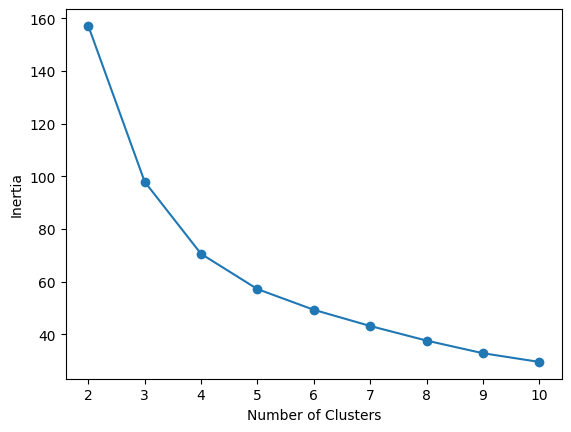

In [41]:
import matplotlib.pyplot as plt

inertia = []
sil_score = []
list_clusters = list(range(2,11))

for num in list_clusters:
    kmeans = KMeans(n_clusters = num)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    # sil_score.append(metrics.silhouette_score(X,y_pred))


plt.plot(list_clusters,inertia)
plt.scatter(list_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [42]:
sil_score = []

for num in list_clusters:
    km = KMeans(n_clusters = num)
    km.fit(X_scaled)
    y_pred = km.predict(X_scaled)
    score = metrics.silhouette_score(X,y_pred)
    sil_score.append({num : score})

sil_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[{2: 0.4195297088560899},
 {3: 0.45109000843116887},
 {4: 0.3704482993493728},
 {5: 0.39257107928817975},
 {6: 0.2648186860066668},
 {7: 0.24532852054988288},
 {8: 0.2537408504338348},
 {9: 0.26233795308845836},
 {10: 0.23308640936926311}]

In [43]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


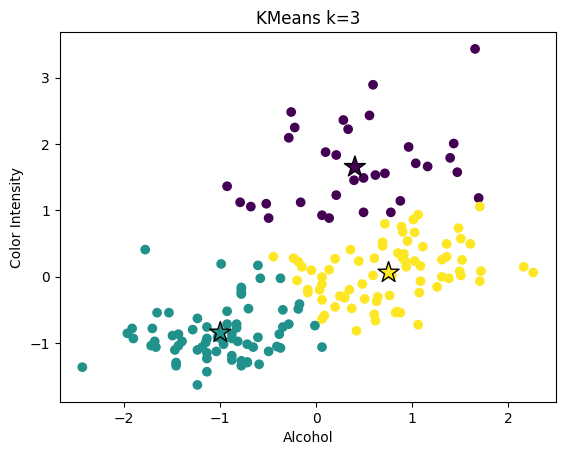

In [44]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="*", s=250, c=[0,1,2], edgecolors="k")

plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
plt.title("KMeans k=3")
plt.show()

Text(0, 0.5, 'Feature 1')

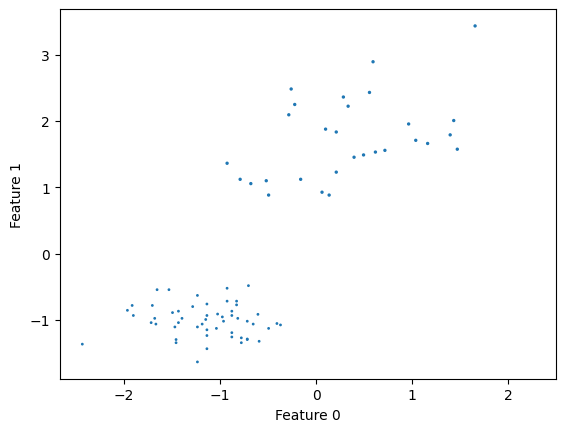

In [45]:
from sklearn.cluster import AgglomerativeClustering



agg = agg = AgglomerativeClustering(n_clusters=3)
agg_cluster = agg.fit_predict(X_scaled)


plt.scatter(X_scaled[:, 0], X_scaled[:, 1], agg_cluster)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [46]:
score = metrics.silhouette_score(X, agg_cluster)

score

0.456208182632913

In [53]:
data.shape

(178, 14)

In [55]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Label                   0
dtype: int64

In [57]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Label                   0
dtype: int64

In [58]:
columns=data.columns

In [59]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [61]:
data.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Label
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,NaN
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,NaN
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,NaN
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,NaN
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,NaN
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,NaN
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,NaN
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,NaN
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,NaN
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,NaN


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'Alcohol'),
  Text(0, 1.5, 'Malic_Acid'),
  Text(0, 2.5, 'Ash'),
  Text(0, 3.5, 'Ash_Alcanity'),
  Text(0, 4.5, 'Magnesium'),
  Text(0, 5.5, 'Total_Phenols'),
  Text(0, 6.5, 'Flavanoids'),
  Text(0, 7.5, 'Nonflavanoid_Phenols'),
  Text(0, 8.5, 'Proanthocyanins'),
  Text(0, 9.5, 'Color_Intensity'),
  Text(0, 10.5, 'Hue'),
  Text(0, 11.5, 'OD280'),
  Text(0, 12.5, 'Proline'),
  Text(0, 13.5, 'Label')])

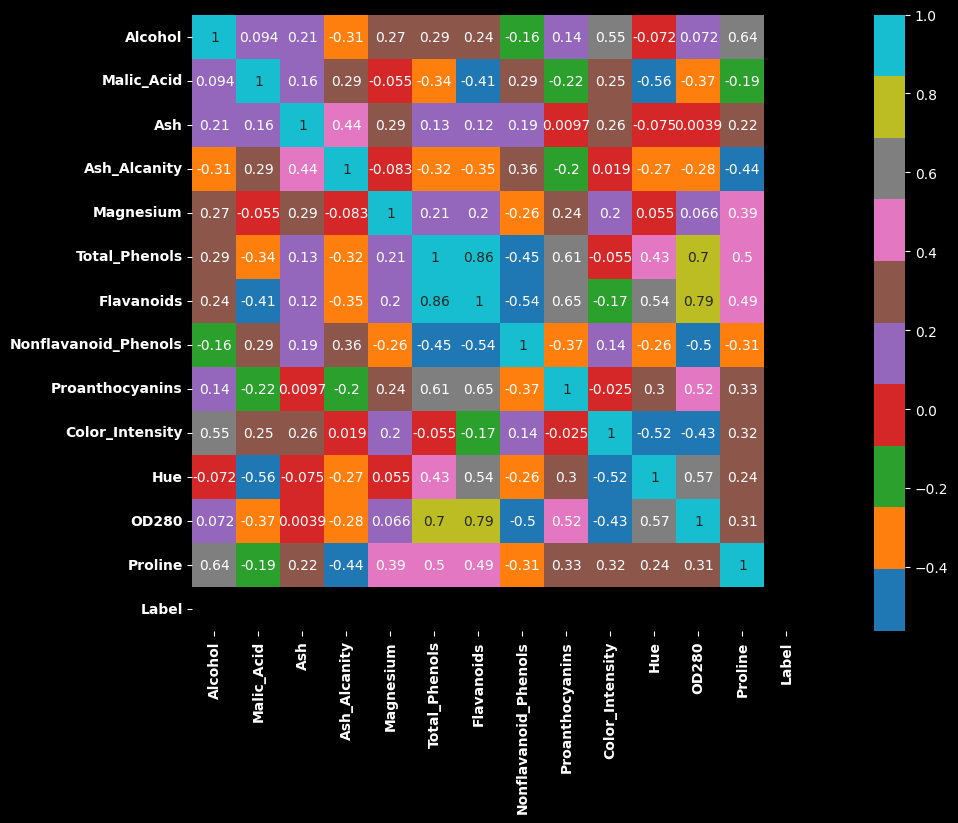

In [63]:
plt.style.use('dark_background')
plt.figure(figsize=(17,8))
sns.heatmap(data.corr(),annot=True,square=True,cmap='tab10')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')

In [84]:
scale=StandardScaler()
df=scale.fit_transform(data)


In [85]:
normal=MinMaxScaler()
df=normal.fit_transform(df)

In [86]:
pca=PCA(n_components=2)
df=pca.fit_transform(df)

In [87]:
new=pd.DataFrame(df,columns=['X','Y'])

In [88]:
new.describe()

,X,Y
count,1.780000e+02,178.000000
mean,-3.991813e-17,0.000000
std,4.691398e-01,0.320095
min,-8.357170e-01,-0.645306
25%,-4.415270e-01,-0.253928
50%,-5.710325e-02,-0.049041
75%,4.662440e-01,0.282307
max,9.152164e-01,0.777543


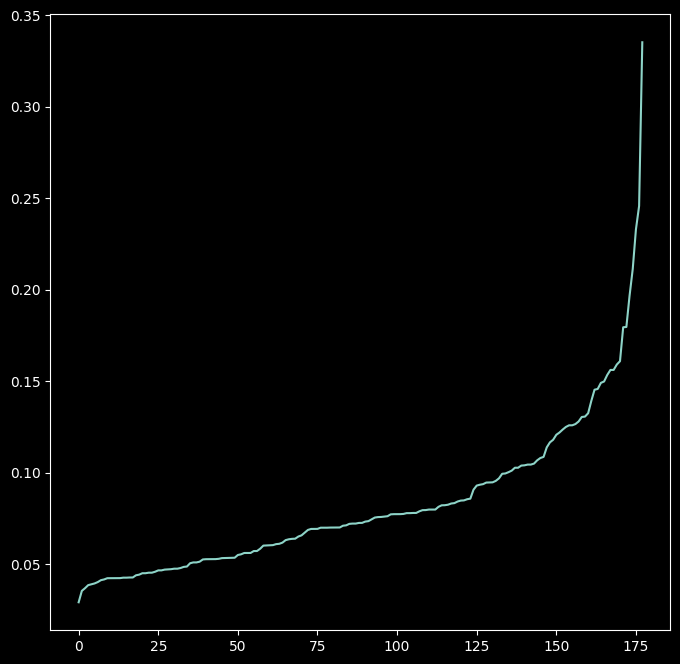

In [89]:
neighbours=NearestNeighbors(n_neighbors=4)
nbrs=neighbours.fit(new)
dis,ind=nbrs.kneighbors(new)
dis=np.sort(dis,axis=0)
dis=dis[:,-1]
plt.figure(figsize=(8,8))
plt.plot(dis)

In [90]:
cluster=DBSCAN(eps=0.09,min_samples=4)
new['Label']=cluster.fit_predict(new)

In [91]:
new.head()

,X,Y,Label
0,-0.706336,-0.253193,-1
1,-0.484977,-0.008823,0
2,-0.521172,-0.189187,0
3,-0.821644,-0.580906,-1
4,-0.202546,-0.059467,1


In [92]:
plt.figure(figsize=(15, 12))
sns.scatterplot(x='X',y='Y',df=new,hue='Label',palette='tab10',s=200)

ValueError: Could not interpret value `X` for `x`. Value is a string, but `data` was not passed.

<Figure size 1500x1200 with 0 Axes>